In [39]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import SimpleRNN,Input,Activation,Reshape,LSTM,GRU,Conv2D,MaxPooling2D,Flatten,Embedding,Dense,Dropout,UpSampling2D
import torch
import keras
import matplotlib.pyplot as plt

####  Logic Gates

In [46]:
import numpy as np

def unit_step(s):
    if s >= 0:
        return 1
    else:
        return 0
def perceptron(x, w, b):
    s = np.dot(w, x) + b
    y = unit_step(s)
    return y

def TAUT_percep(x1,x2):  
    w = np.array([0, 0])
    b = 1
    x = np.array([x1,x2])
    return perceptron(x, w, b)

print("TAUT({}, {}) = {}".format(1, 1, TAUT_percep(1,1)))
print("TAUT({}, {}) = {}".format(1, 0, TAUT_percep(1,0)))
print("TAUT({}, {}) = {}".format(0, 1, TAUT_percep(0,1)))
print("TAUT({}, {}) = {}".format(0, 0, TAUT_percep(0,0)))

def NOT_percep(x):    
    return perceptron(x, w=-1, b=0.5)

print("NOT(0) = {}".format(NOT_percep(0)))
print("NOT(1) = {}".format(NOT_percep(1)))

def AND_percep(x1,x2):
    w = np.array([1, 1])
    b =-1.5
    x = np.array([x1,x2])
    return perceptron(x, w, b)

print("AND({}, {}) = {}".format(1, 1, AND_percep(1,1)))
print("AND({}, {}) = {}".format(1, 0, AND_percep(1,0)))
print("AND({}, {}) = {}".format(0, 1, AND_percep(0,1)))
print("AND({}, {}) = {}".format(0, 0, AND_percep(0,0)))

def OR_percep(x1,x2):
    w = np.array([1, 1])
    b =-0.5
    x = np.array([x1,x2])
    return perceptron(x, w, b)

print("OR({}, {}) = {}".format(1, 1, OR_percep(1,1)))
print("OR({}, {}) = {}".format(1, 0, OR_percep(1,0)))
print("OR({}, {}) = {}".format(0, 1, OR_percep(0,1)))
print("OR({}, {}) = {}".format(0, 0, OR_percep(0,0)))

def XOR_net(x1,x2):
    out_1 = AND_percep(x1,x2)
    out_2 = NOT_percep(out_1)
    out_3 = OR_percep(x1,x2)
    output = AND_percep(out_2,out_3)
    return output

print("XOR({}, {}) = {}".format(1, 1, XOR_net(1,1)))
print("XOR({}, {}) = {}".format(1, 0, XOR_net(1,0)))
print("XOR({}, {}) = {}".format(0, 1, XOR_net(0,1)))
print("XOR({}, {}) = {}".format(0, 0, XOR_net(0,0)))

def NOR_net(x1,x2):
    out_1 = OR_percep(x1,x2)
    output = NOT_percep(out_1)
    return output

print("NOR({}, {}) = {}".format(1, 1, NOR_net(1,1)))
print("NOR({}, {}) = {}".format(1, 0, NOR_net(1,0)))
print("NOR({}, {}) = {}".format(0, 1, NOR_net(0,1)))
print("NOR({}, {}) = {}".format(0, 0, NOR_net(0,0)))

def NAND_net(x1,x2):
    out_1 = AND_percep(x1,x2)
    output = NOT_percep(out_1)
    return output

print("NOR({}, {}) = {}".format(1, 1, NAND_net(1,1)))
print("NOR({}, {}) = {}".format(1, 0, NAND_net(1,0)))
print("NOR({}, {}) = {}".format(0, 1, NAND_net(0,1)))
print("NOR({}, {}) = {}".format(0, 0, NAND_net(0,0)))

TAUT(1, 1) = 1
TAUT(1, 0) = 1
TAUT(0, 1) = 1
TAUT(0, 0) = 1
NOT(0) = 1
NOT(1) = 0
AND(1, 1) = 1
AND(1, 0) = 0
AND(0, 1) = 0
AND(0, 0) = 0
OR(1, 1) = 1
OR(1, 0) = 1
OR(0, 1) = 1
OR(0, 0) = 0
XOR(1, 1) = 0
XOR(1, 0) = 1
XOR(0, 1) = 1
XOR(0, 0) = 0
NOR(1, 1) = 0
NOR(1, 0) = 0
NOR(0, 1) = 0
NOR(0, 0) = 1
NOR(1, 1) = 0
NOR(1, 0) = 1
NOR(0, 1) = 1
NOR(0, 0) = 1


### XNOR

1 Input Layer <br>
1 Hidden Layer - 2 Neurons <br>
1 Output Layer - 1 Neuron

In [ ]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[1],[0],[0],[1]])

w1 = np.array([[1,-1],[1,-1]])
w2 = np.array([[1],[1]])

bias = np.array([[-1,1]])

y_cap = step(step(x@w1 + bias)@w2)
y_cap

array([[1],
       [0],
       [0],
       [1]])

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.boston_housing.load_data()

In [ ]:
mean = x_train.mean()
x_train = x_train - mean
std = x_train.std()
x_train/=std

In [ ]:
x_test -= mean
x_test /= std

In [ ]:
x_test.shape

(102, 13)

### MODEL 1

In [ ]:
model1 = Sequential()
model1.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],)))
model1.add(Dense(16,activation='relu'))
model1.add(Dense(1))
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model1.compile(optimizer=opt,loss='MAPE')
history1 = model1.fit(x=x_train,y=y_train,epochs=1000,validation_data=(x_test,y_test))

Epoch 1/1000
13/13 [==============================] - 1s 20ms/step - loss: 139.0666 - val_loss: 76.8312
Epoch 2/1000
13/13 [==============================] - 0s 6ms/step - loss: 62.1396 - val_loss: 50.8851
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 40.5181 - val_loss: 40.7767
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 33.1572 - val_loss: 37.7680
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 31.4480 - val_loss: 36.5413
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 31.0195 - val_loss: 35.9174
Epoch 7/1000
13/13 [==============================] - 0s 6ms/step - loss: 30.8785 - val_loss: 35.6408
Epoch 8/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8472 - val_loss: 35.6277
Epoch 9/1000
13/13 [==============================] - 0s 6ms/step - loss: 30.8731 - val_loss: 35.5813
Epoch 10/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.88

13/13 [==============================] - 0s 5ms/step - loss: 30.8687 - val_loss: 35.6392
Epoch 160/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8999 - val_loss: 35.6828
Epoch 161/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.9036 - val_loss: 35.7167
Epoch 162/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8701 - val_loss: 35.6338
Epoch 163/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8444 - val_loss: 35.6062
Epoch 164/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8521 - val_loss: 35.6851
Epoch 165/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8936 - val_loss: 35.5382
Epoch 166/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8527 - val_loss: 35.4675
Epoch 167/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8959 - val_loss: 35.5292
Epoch 168/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.

Epoch 238/1000
13/13 [==============================] - 0s 6ms/step - loss: 30.8878 - val_loss: 35.5018
Epoch 239/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.9024 - val_loss: 35.5138
Epoch 240/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8548 - val_loss: 35.6048
Epoch 241/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8667 - val_loss: 35.6281
Epoch 242/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8901 - val_loss: 35.5833
Epoch 243/1000
13/13 [==============================] - 0s 7ms/step - loss: 30.8881 - val_loss: 35.5716
Epoch 244/1000
13/13 [==============================] - 0s 6ms/step - loss: 30.8928 - val_loss: 35.5634
Epoch 245/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8917 - val_loss: 35.5821
Epoch 246/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8511 - val_loss: 35.6377
Epoch 247/1000
13/13 [==============================] - 0s 5ms/s

Epoch 395/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8681 - val_loss: 35.5170
Epoch 396/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8503 - val_loss: 35.5639
Epoch 397/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8797 - val_loss: 35.5745
Epoch 398/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8720 - val_loss: 35.6541
Epoch 399/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8774 - val_loss: 35.5716
Epoch 400/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8492 - val_loss: 35.6589
Epoch 401/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8791 - val_loss: 35.7256
Epoch 402/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8610 - val_loss: 35.7026
Epoch 403/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8803 - val_loss: 35.7028
Epoch 404/1000
13/13 [==============================] - 0s 5ms/s

Epoch 552/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8601 - val_loss: 35.5780
Epoch 553/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8430 - val_loss: 35.7768
Epoch 554/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.9092 - val_loss: 35.6307
Epoch 555/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8544 - val_loss: 35.6067
Epoch 556/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8611 - val_loss: 35.5512
Epoch 557/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8740 - val_loss: 35.5886
Epoch 558/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8670 - val_loss: 35.5894
Epoch 559/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8985 - val_loss: 35.4746
Epoch 560/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8566 - val_loss: 35.5491
Epoch 561/1000
13/13 [==============================] - 0s 5ms/s

Epoch 631/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8941 - val_loss: 35.5044
Epoch 632/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8569 - val_loss: 35.5466
Epoch 633/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8838 - val_loss: 35.7231
Epoch 634/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.9026 - val_loss: 35.8089
Epoch 635/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8608 - val_loss: 35.7164
Epoch 636/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8614 - val_loss: 35.7182
Epoch 637/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8687 - val_loss: 35.5937
Epoch 638/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8510 - val_loss: 35.7007
Epoch 639/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8905 - val_loss: 35.5314
Epoch 640/1000
13/13 [==============================] - 0s 5ms/s

Epoch 710/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8680 - val_loss: 35.5985
Epoch 711/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8616 - val_loss: 35.5598
Epoch 712/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8405 - val_loss: 35.5246
Epoch 713/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8885 - val_loss: 35.4741
Epoch 714/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8708 - val_loss: 35.5285
Epoch 715/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8887 - val_loss: 35.4948
Epoch 716/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8732 - val_loss: 35.6099
Epoch 717/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8576 - val_loss: 35.5293
Epoch 718/1000
13/13 [==============================] - 0s 6ms/step - loss: 30.9023 - val_loss: 35.4941
Epoch 719/1000
13/13 [==============================] - 0s 6ms/s

Epoch 789/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8896 - val_loss: 35.5909
Epoch 790/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8546 - val_loss: 35.5278
Epoch 791/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8579 - val_loss: 35.5770
Epoch 792/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8716 - val_loss: 35.4964
Epoch 793/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8483 - val_loss: 35.5234
Epoch 794/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8712 - val_loss: 35.5128
Epoch 795/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8874 - val_loss: 35.6443
Epoch 796/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8665 - val_loss: 35.5265
Epoch 797/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8500 - val_loss: 35.6704
Epoch 798/1000
13/13 [==============================] - 0s 5ms/s

Epoch 868/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8898 - val_loss: 35.5241
Epoch 869/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8862 - val_loss: 35.5432
Epoch 870/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8427 - val_loss: 35.5804
Epoch 871/1000
13/13 [==============================] - 0s 6ms/step - loss: 30.8500 - val_loss: 35.6093
Epoch 872/1000
13/13 [==============================] - 0s 7ms/step - loss: 30.8794 - val_loss: 35.6082
Epoch 873/1000
13/13 [==============================] - 0s 6ms/step - loss: 30.8620 - val_loss: 35.5350
Epoch 874/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8794 - val_loss: 35.5336
Epoch 875/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.9158 - val_loss: 35.5653
Epoch 876/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8658 - val_loss: 35.5948
Epoch 877/1000
13/13 [==============================] - 0s 5ms/s

Epoch 947/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.9450 - val_loss: 35.5770
Epoch 948/1000
13/13 [==============================] - 0s 4ms/step - loss: 30.8601 - val_loss: 35.6581
Epoch 949/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8635 - val_loss: 35.6832
Epoch 950/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8889 - val_loss: 35.7555
Epoch 951/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8686 - val_loss: 35.5988
Epoch 952/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8589 - val_loss: 35.5829
Epoch 953/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8489 - val_loss: 35.6916
Epoch 954/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8964 - val_loss: 35.6285
Epoch 955/1000
13/13 [==============================] - 0s 5ms/step - loss: 30.8970 - val_loss: 35.6889
Epoch 956/1000
13/13 [==============================] - 0s 4ms/s

### MODEL 2 - Early Stopping

In [ ]:
model2 = Sequential()
model2.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],)))
model2.add(Dense(1))

es = EarlyStopping(monitor='loss',mode='min',patience=25)
opt = tf.keras.optimizers.SGD(learning_rate=1e-3)

model2.compile(optimizer=opt,loss='MAPE')
history2 = model2.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test),callbacks=[es])

Epoch 1/1000
13/13 [==============================] - 1s 13ms/step - loss: 99.5559 - val_loss: 95.2041
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 91.8190 - val_loss: 86.2072
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 82.2448 - val_loss: 75.0067
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 70.3085 - val_loss: 63.6074
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 57.2590 - val_loss: 55.3847
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 48.2394 - val_loss: 50.6813
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 42.9846 - val_loss: 47.2100
Epoch 8/1000
13/13 [==============================] - 0s 6ms/step - loss: 40.0991 - val_loss: 45.2596
Epoch 9/1000
13/13 [==============================] - 0s 6ms/step - loss: 38.3169 - val_loss: 43.7570
Epoch 10/1000
13/13 [==============================] - 0s 7ms/step - loss: 36.757

13/13 [==============================] - 0s 5ms/step - loss: 20.0562 - val_loss: 24.7235
Epoch 160/1000
13/13 [==============================] - 0s 4ms/step - loss: 20.0572 - val_loss: 24.7400
Epoch 161/1000
13/13 [==============================] - 0s 5ms/step - loss: 20.1147 - val_loss: 24.6927
Epoch 162/1000
13/13 [==============================] - 0s 5ms/step - loss: 20.1488 - val_loss: 24.6829
Epoch 163/1000
13/13 [==============================] - 0s 5ms/step - loss: 20.0648 - val_loss: 24.7523
Epoch 164/1000
13/13 [==============================] - 0s 4ms/step - loss: 20.1678 - val_loss: 24.6222
Epoch 165/1000
13/13 [==============================] - 0s 5ms/step - loss: 20.0385 - val_loss: 24.5923
Epoch 166/1000
13/13 [==============================] - 0s 4ms/step - loss: 20.0584 - val_loss: 24.6451
Epoch 167/1000
13/13 [==============================] - 0s 5ms/step - loss: 20.0774 - val_loss: 24.5883
Epoch 168/1000
13/13 [==============================] - 0s 4ms/step - loss: 20.

Epoch 238/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.7376 - val_loss: 24.6741
Epoch 239/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.6731 - val_loss: 24.3250
Epoch 240/1000
13/13 [==============================] - 0s 4ms/step - loss: 19.7182 - val_loss: 24.2961
Epoch 241/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.5740 - val_loss: 24.3500
Epoch 242/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.6820 - val_loss: 24.4054
Epoch 243/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.6501 - val_loss: 24.4375
Epoch 244/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.5314 - val_loss: 24.6045
Epoch 245/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.6467 - val_loss: 24.3853
Epoch 246/1000
13/13 [==============================] - 0s 4ms/step - loss: 19.5867 - val_loss: 24.4360
Epoch 247/1000
13/13 [==============================] - 0s 4ms/s

Epoch 317/1000
13/13 [==============================] - 0s 4ms/step - loss: 19.2973 - val_loss: 24.0571
Epoch 318/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.2024 - val_loss: 24.3514
Epoch 319/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.2863 - val_loss: 24.0761
Epoch 320/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.4778 - val_loss: 24.1323
Epoch 321/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.2092 - val_loss: 24.1110
Epoch 322/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.2640 - val_loss: 24.1559
Epoch 323/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.2643 - val_loss: 24.1191
Epoch 324/1000
13/13 [==============================] - 0s 4ms/step - loss: 19.2625 - val_loss: 24.1046
Epoch 325/1000
13/13 [==============================] - 0s 4ms/step - loss: 19.3276 - val_loss: 24.1135
Epoch 326/1000
13/13 [==============================] - 0s 4ms/s

Epoch 396/1000
13/13 [==============================] - 0s 4ms/step - loss: 19.1027 - val_loss: 23.9524
Epoch 397/1000
13/13 [==============================] - 0s 4ms/step - loss: 19.0640 - val_loss: 23.8583
Epoch 398/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.0687 - val_loss: 23.8508
Epoch 399/1000
13/13 [==============================] - 0s 5ms/step - loss: 19.0263 - val_loss: 23.8202
Epoch 400/1000
13/13 [==============================] - 0s 5ms/step - loss: 18.9840 - val_loss: 23.8715
Epoch 401/1000
13/13 [==============================] - 0s 5ms/step - loss: 18.9910 - val_loss: 23.7915
Epoch 402/1000
13/13 [==============================] - 0s 4ms/step - loss: 19.0753 - val_loss: 23.7519
Epoch 403/1000
13/13 [==============================] - 0s 5ms/step - loss: 18.9339 - val_loss: 23.9147
Epoch 404/1000
13/13 [==============================] - 0s 5ms/step - loss: 18.9712 - val_loss: 23.7844
Epoch 405/1000
13/13 [==============================] - 0s 5ms/s

### Linear Regression

In [ ]:
n = x_train.shape[0]
x_train = torch.tensor(x_train,dtype=torch.float)
y_train = torch.tensor(y_train,dtype=torch.float)
x_test = torch.tensor(x_test,dtype=torch.float)
y_test = torch.tensor(y_test,dtype=torch.float)

In [ ]:
datasets = torch.utils.data.TensorDataset(x_train,y_train)

In [ ]:
train_iter = torch.utils.data.DataLoader(datasets,batch_size=10,shuffle=True)

In [ ]:
loss = torch.nn.MSELoss()

In [ ]:
weight_n = x_train.shape[1]
net = torch.nn.Sequential(torch.nn.Linear(weight_n,1))
torch.nn.init.normal(net)
torch.nn.init.constant_(net[0].bias, val=0)

In [ ]:
num_epochs = 1000
for epoch in range(num_epochs):
    for x, y in train_iter:
        output = net(x)
        l = loss(output, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print("epoch {} loss: {:.4f}".format(epoch + 1, l.item()))

### MNIST

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

x_train=x_train/255
x_test=x_test/255

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

# y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)

model3 = Sequential()
model3.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu',
                 input_shape=(28,28,1)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(256,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10,activation='softmax'))

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

opt = tf.keras.optimizers.Adam(learning_rate=0.00001)

model3.compile(optimizer=opt,loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

history3 = model3.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

### ANN

In [ ]:
model4 = Sequential()
model4.add(Flatten())
model4.add(Dense(256, activation = "relu"))
model4.add(Dense(64, activation = "softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00001)

In [ ]:
model4.compile(optimizer=opt,loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
history4 = model4.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1)

1875/1875 [==============================] - 9s 4ms/step - loss: 2.2841 - accuracy: 0.5383 - val_loss: 1.1263 - val_accuracy: 0.8137


### RNN

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

In [ ]:
(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

((25000,), (25000,), (25000,), (25000,))

In [ ]:
from keras.utils import pad_sequences
x_train = pad_sequences(x_train,maxlen=300)
x_test = pad_sequences(x_test,maxlen=300)

In [ ]:
model5 = Sequential()
model5.add(Embedding(10000,32,input_length=(300)))
model5.add(SimpleRNN(16,activation='relu'))
model5.add(Dense(1,activation='sigmoid'))

In [ ]:
model5.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 300, 32)           320000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense_45 (Dense)            (None, 1)                 17        
                                                                 
 activation_3 (Activation)   (None, 1)                 0         
                                                                 
Total params: 320,801
Trainable params: 320,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

((25000, 300), (25000,), (25000, 300), (25000,))

In [ ]:
model5.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
history5 = model5.fit(x_train,y_train,epochs=10)

Epoch 1/10
782/782 [==============================] - 63s 79ms/step - loss: 0.5746 - accuracy: 0.6969
Epoch 2/10
782/782 [==============================] - 62s 80ms/step - loss: 0.3633 - accuracy: 0.8478
Epoch 3/10
782/782 [==============================] - 61s 78ms/step - loss: 0.2910 - accuracy: 0.8816
Epoch 4/10
782/782 [==============================] - 61s 78ms/step - loss: 0.2431 - accuracy: 0.9042
Epoch 5/10
782/782 [==============================] - 66s 84ms/step - loss: 0.2202 - accuracy: 0.9171
Epoch 6/10
782/782 [==============================] - 65s 83ms/step - loss: 0.2014 - accuracy: 0.9266
Epoch 7/10
782/782 [==============================] - 62s 79ms/step - loss: 0.1791 - accuracy: 0.9326
Epoch 8/10
782/782 [==============================] - 63s 81ms/step - loss: 0.1707 - accuracy: 0.9374
Epoch 9/10
782/782 [==============================] - 61s 78ms/step - loss: 0.1568 - accuracy: 0.9427
Epoch 10/10
782/782 [==============================] - 58s 74ms/step - loss: 0.143

### LSTM

In [ ]:
model6 = Sequential()
model6.add(Embedding(10000,input_length=(300),output_dim=32))
model6.add(LSTM(128))
model6.add(Dense(1,activation='sigmoid'))

In [ ]:
model6.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history6 = model6.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

Epoch 1/3
 34/782 [>.............................] - ETA: 3:41 - loss: 0.6928 - accuracy: 0.5303

KeyboardInterrupt: 

### GRU

In [ ]:
model7 = Sequential()
model7.add(Embedding(10000,input_length=(300),output_dim=32))
model7.add(GRU(128))
model7.add(Dense(1,activation='sigmoid'))

In [ ]:
model7.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history7 = model7.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

### TEXT Generation

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import keras
from keras.models import Sequential,Model
from keras.layers import Conv2D,MaxPooling2D,Input,Dense,Dropout,Flatten,Reshape,Embedding,GRU,LSTM,SimpleRNN
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

with open ('C:/Users/sanja/Downloads/poems (1).txt') as f:
    text = f.read()
print(text)    

from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(text)
print("hey There : ",tokenizer.texts_to_sequences('hey There'))
print("hey There : ",tokenizer.texts_to_sequences(['hey There']))

data = np.array(tokenizer.texts_to_sequences([text]))[0] - 1
data

vo_len = len(tokenizer.word_index)
seq_len = 100
data = tf.data.Dataset.from_tensor_slices(data)
data = data.batch(seq_len+1,drop_remainder=True)
data = data.map(lambda x : (x[:-1],x[1:]))
data = data.shuffle(1000).batch(64)


tok = Sequential()
tok.add(Embedding(vo_len,32))
tok.add(GRU(100,return_sequences=True,dropout=0.1))
tok.add(Dense(vo_len,activation='softmax'))

tok.compile(loss='sparse_categorical_crossentropy',optimizer='adam')
his=tok.fit(data,epochs=1000,verbose=False)

def generator(s):
    dat = np.array(tokenizer.texts_to_sequences([s]))-1
    dat = tok.predict(dat)
    out = np.argmax(dat,axis=-1)+1
    out = tokenizer.sequences_to_texts(out)[0][-1]
    return out

def pred(s,loop=10):
    for _ in range(loop):
        s+=generator(s)
    return s    

print(pred('he was'))

ï»¿Buffalo Billâ€™s
defunct
who used to
ride a watersmooth-silver
stallion
and break one two three four five pigeons just like that
Jesus

he was a handsome man
and what i want to know is
how do you like your blueeyed boy
Mister Death

Had I the heavenâ€™s embroidered cloths,
Enwrought with golden and silver light,
The blue and the dim and the dark cloths
Of night and light and the half-light,
I would spread the cloths under your feet:
But I, being poor, have only my dreams;
I have spread my dreams under your feet;
Tread softly because you tread on my dreams.

He clasps the crag with crooked hands;
Close to the sun in lonely lands,
Ringâ€™d with the azure world, he stands.

The wrinkled sea beneath him crawls;
He watches from his mountain walls,
And like a thunderbolt he falls.

Some say the world will end in fire,
Some say in ice.
From what Iâ€™ve tasted of desire
I hold with those who favor fire.
But if it had to perish twice,
I think I know enough of hate
To say that for destruction

CIFAR10

Epoch 1/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.5388 - accuracy: 0.4399 - val_loss: 1.2515 - val_accuracy: 0.5522
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1432 - accuracy: 0.5993 - val_loss: 1.0675 - val_accuracy: 0.6262
Epoch 3/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9943 - accuracy: 0.6534 - val_loss: 0.9741 - val_accuracy: 0.6584
Epoch 4/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8937 - accuracy: 0.6871 - val_loss: 0.9511 - val_accuracy: 0.6679
Epoch 5/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8165 - accuracy: 0.7145 - val_loss: 0.8903 - val_accuracy: 0.6899
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7629 - accuracy: 0.7342 - val_loss: 0.8491 - val_accuracy: 0.7091
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7125 - accuracy: 0.7505 - val_loss: 0.8647 -

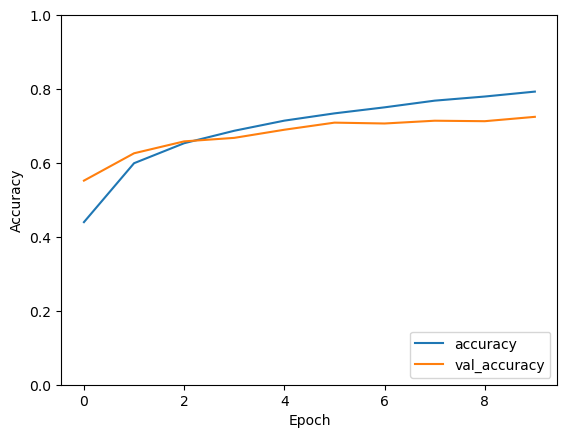

In [7]:
import tensorflow as tf
from tensorflow.keras import layers,datasets,models
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

x_train,x_test=x_train/255.0,x_test/255.0


x_train.shape

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10))

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Sentiment Analysis

In [24]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)

from tensorflow.keras.layers import Dense,SimpleRNN,Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence

max_words=1000
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=max_words))  # Embedding layer
model.add(SimpleRNN(units=32))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

batch_size = 64
epochs = 5
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
313/313 [==============================] - 65s 204ms/step - loss: 0.5975 - accuracy: 0.6667 - val_loss: 0.4367 - val_accuracy: 0.8124
Epoch 2/5
313/313 [==============================] - 66s 212ms/step - loss: 0.3648 - accuracy: 0.8462 - val_loss: 0.3796 - val_accuracy: 0

AUTO ENCODER

Epoch 1/20
469/469 [==============================] - 12s 13ms/step - loss: 0.0506 - val_loss: 0.0293
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0252 - val_loss: 0.0213
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0199 - val_loss: 0.0178
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0174 - val_loss: 0.0161
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0159 - val_loss: 0.0147
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0146 - val_loss: 0.0138
Epoch 7/20
469/469 [==============================] - 4s 7ms/step - loss: 0.0136 - val_loss: 0.0130
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0128 - val_loss: 0.0122
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0122 - val_loss: 0.0117
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0117 - val_loss: 0

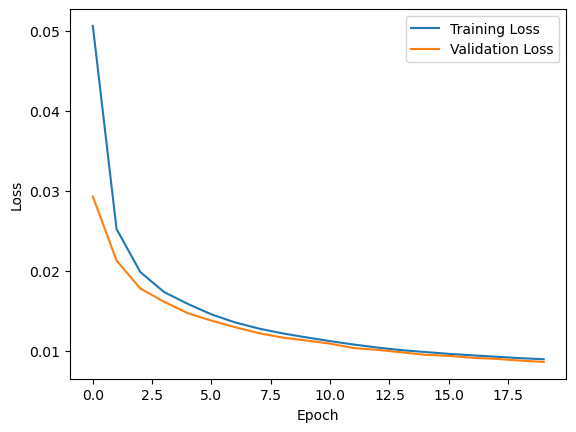

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data for the autoencoder
x_train = x_train.reshape(len(x_train), 784)
x_test = x_test.reshape(len(x_test), 784)

# Define the autoencoder architecture
input_layer = Input(shape=(784,))
encoder = Dense(128, activation='relu')(input_layer)
encoder = Dense(64, activation='relu')(encoder)
encoder = Dense(32, activation='relu')(encoder)

decoder = Dense(64, activation='relu')(encoder)
decoder = Dense(128, activation='relu')(decoder)
decoder = Dense(784, activation='sigmoid')(decoder)

autoencoder = Model(input_layer, decoder)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=128, validation_data=(x_test, x_test))

# Plot the loss versus epoch curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ANN VS CNN

In [28]:
import keras 
from keras.datasets import mnist
from keras.utils import to_categorical 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense,Flatten

## CNN

(x_train,y_train),(x_test,y_test) = mnist.load_data() 

x_train.shape

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train / 255.0
x_test = x_test / 255.0


# Convert labels to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


## ANN

(x_train,y_train),(x_test,y_test) = mnist.load_data() 

x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

ann_model = Sequential()
ann_model.add(Dense(32,activation='relu'))
ann_model.add(Dense(64,activation='relu'))
ann_model.add(Dense(10,activation='softmax'))

ann_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

ann_model.fit(x_train,y_train,epochs=5,validation_data=[x_test,y_test])

## Comparing Results

results = {
    'model':['CNN','ANN'],
    'accuracy':[98.4,96.89]
}
import pandas as pd
pd.DataFrame(results)

Epoch 1/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1779 - accuracy: 0.9466 - val_loss: 0.0720 - val_accuracy: 0.9771
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0614 - accuracy: 0.9811 - val_loss: 0.0517 - val_accuracy: 0.9824
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0408 - accuracy: 0.9874 - val_loss: 0.0518 - val_accuracy: 0.9826
Epoch 4/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0432 - val_accuracy: 0.9854
Epoch 5/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0212 - accuracy: 0.9930 - val_loss: 0.0440 - val_accuracy: 0.9854
Epoch 1/5
1875/1875 [==============================] - 52s 26ms/step - loss: 0.1738 - accuracy: 0.9491 - val_loss: 0.0808 - val_accuracy: 0.9748
Epoch 2/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0606 - accuracy: 0.9823 - val_loss: 0.0511 - val_ac

,model,accuracy
0,CNN,98.40
1,ANN,96.89
